# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
train = pd.read_csv('df_train.csv')
test = pd.read_csv("df_test.csv")

In [4]:
train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [5]:
test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

In [6]:
merged_data = pd.concat([train, test])
merged_data.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [7]:
final_data = merged_data.drop(['Unnamed: 0', 'time'], axis = 1)
final_data.head()

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667           level_5             0.0             0.666667   
1           0.333333          level_10             0.0             1.666667   
2           1.000000           level_9             0.0             1.000000   
3           1.000000           level_8             0.0             1.000000   
4           1.000000           level_7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Madrid_temp_max  Barcelona_temp  \
0                 0.0       223.333333  ...       265.938000      281.013000   
1                 0.0       221.000000  ...       266.386667      280.561667   
2                 0.0       214.333333  ...       272.708667      281.583667   
3                 0.0       199.666667  ...       281.895219      283.434104   
4                 0.0       185.000000  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min Bilbao_temp_max  \
0       269.338615   269.338615          281.013000      269.338615   
1       270.376000   270.376000          280.561667      270.376000   
2       275.027229   275.027229          281.583667      275.027229   
3       281.135063   281.135063          283.434104      281.135063   
4       282.252063   282.252063          284.213167      282.252063   

   Seville_temp_min  Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667   265.938000       265.938000        6715.666667  
1        274.945000   266.386667       266.386667        4171.666667  
2        278.792000   272.708667       272.708667        4274.666667  
3        285.394000   281.895219       281.895219        5075.666667  
4        285.513719   280.678437       280.678437        6620.666667  

[5 rows x 47 columns]

In [8]:
final_data.shape

(11683, 47)

In [9]:
final_data.tail()

Madrid_wind_speed Valencia_wind_deg  Bilbao_rain_1h  \
2915           0.333333           level_9             0.0   
2916           0.333333           level_8             0.0   
2917           1.000000           level_6             0.0   
2918           1.000000           level_6             0.0   
2919           1.333333          level_10             0.0   

      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
2915             2.000000         81.666667        49.666667   
2916             1.333333         61.000000        28.333333   
2917             3.000000         47.000000        26.333333   
2918             2.000000         52.666667        56.666667   
2919             2.333333         61.666667        69.333333   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
2915          80.000000           1.333333                 0.0   
2916          56.666667           1.000000                 0.0   
2917           0.000000           0.666667                 0.0   
2918           0.000000           0.666667                 0.0   
2919           0.000000           1.333333                 0.0   

      Bilbao_wind_deg  ...  Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  \
2915        70.000000  ...       281.483333      278.140000       270.816667   
2916        36.666667  ...       287.816667      286.150000       278.150000   
2917        14.666667  ...       288.816667      288.820000       284.150000   
2918        19.000000  ...       285.150000      284.473333       280.150000   
2919       120.000000  ...       276.816667      281.133333       276.150000   

      Bilbao_temp  Barcelona_temp_min Bilbao_temp_max  Seville_temp_min  \
2915   273.210000          276.483333      276.150000        279.816667   
2916   278.443333          285.816667      278.816667        287.150000   
2917   285.073333          288.150000      285.816667        290.816667   
2918   281.626667          283.150000      282.816667        287.483333   
2919   276.450000          278.483333      276.816667        283.816667   

      Madrid_temp  Madrid_temp_min  load_shortfall_3h  
2915   274.910000       271.150000                NaN  
2916   283.156667       280.483333                NaN  
2917   287.733333       286.483333                NaN  
2918   283.813333       282.150000                NaN  
2919   276.623333       276.483333                NaN  

[5 rows x 47 columns]

In [10]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  object 
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure    

In [11]:
final_data.isnull().sum()

Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp               0
Valencia_humid

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


# I. Univariate Analysis: Non-Graphical

In [ ]:
# look at data statistics

In [12]:
final_data.describe()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count       11683.000000    11683.000000         11683.000000   
mean            2.433750        0.118698             2.692873   
std             1.831762        0.334918             2.321759   
min             0.000000        0.000000             0.000000   
25%             1.000000        0.000000             1.000000   
50%             2.000000        0.000000             2.000000   
75%             3.333333        0.100000             3.666667   
max            13.333333        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count      11683.000000     11683.000000       11683.000000   
mean          63.774687        58.721818          43.440712   
std           22.219380        24.390621          32.046215   
min            8.333333         6.333333           0.000000   
25%           46.333333        38.000000          12.000000   
50%           67.000000        59.333333          45.000000   
75%           83.000000        80.000000          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
count       11683.000000        11683.000000     11683.000000   
mean            1.958629           14.155268       159.878855   
std             1.696043           24.541321       101.005654   
min             0.000000            0.000000         0.000000   
25%             1.000000            0.000000        76.666667   
50%             1.333333            0.000000       145.666667   
75%             2.666667           20.000000       233.333333   
max            12.666667           97.333333       360.000000   

       Barcelona_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
count          11683.000000  ...     11683.000000    11683.000000   
mean               2.782419  ...       289.377372      289.869413   
std                1.758587  ...         9.594562        6.680538   
min                0.000000  ...       264.983333      270.816667   
25%                1.333333  ...       282.150000      284.816667   
50%                2.333333  ...       287.843333      289.426667   
75%                3.666667  ...       296.483333      295.150000   
max               12.666667  ...       314.483333      308.150000   

       Bilbao_temp_min   Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
count     11683.000000  11683.000000        11683.000000     11683.000000   
mean        284.993657    286.447784          288.616766       288.095397   
std           6.730076      6.738466            6.391989         6.898601   
min         264.483333    267.483333          269.483333       269.063000   
25%         280.122526    281.483448          284.150000       283.150000   
50%         284.816667    286.193333          288.276333       287.816667   
75%         289.816667    291.040000          293.483333       292.483333   
max         309.816667    310.710000          306.816667       317.966667   

       Seville_temp_min   Madrid_temp  Madrid_temp_min  load_shortfall_3h  
count      11683.000000  11683.000000     11683.000000        8763.000000  
mean         291.263219    288.282055       287.056222       10673.857612  
std            8.136234      9.258559         9.093455        5218.046404  
min          270.150000    264.983333       264.983333       -6618.000000  
25%          285.483333    281.250000       280.150000        7390.333333  
50%          290.382000    286.923333       285.816667       11114.666667  
75%          296.641333    294.993167       293.708917       14498.166667  
max          314.816667    313.133333       310.383333       31904.000000  

[8 rows x 45 columns]

In [13]:
print('Descriptive Statistics Of Madrid_wind_speed:',final_data.Madrid_wind_speed.describe())
print()
print('Descriptive Statistics Of Bilbao_rain_1h:' ,final_data.Bilbao_rain_1h.describe())
print()
print('Descriptive Statistics Of Valencia_wind_speed:',final_data.Valencia_wind_speed.describe())
print()


Descriptive Statistics Of Madrid_wind_speed: count    11683.000000
mean         2.433750
std          1.831762
min          0.000000
25%          1.000000
50%          2.000000
75%          3.333333
max         13.333333
Name: Madrid_wind_speed, dtype: float64

Descriptive Statistics Of Bilbao_rain_1h: count    11683.000000
mean         0.118698
std          0.334918
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          3.000000
Name: Bilbao_rain_1h, dtype: float64

Descriptive Statistics Of Valencia_wind_speed: count    11683.000000
mean         2.692873
std          2.321759
min          0.000000
25%          1.000000
50%          2.000000
75%          3.666667
max         52.000000
Name: Valencia_wind_speed, dtype: float64



In [17]:
print('Skew Analysis For Each Feature In The Dataframe')
final_data.skew()

Skew Analysis For Each Feature In The Dataframe


Madrid_wind_speed        1.452792
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressure         -0.977531
Seville_weather_id      -3.230498
Valencia_pressure       -1.800572
Seville_temp_max         0.122162
Madrid_pressure         -2.140249
Valencia_temp_max        0.068277
Valencia_temp 

In [ ]:
From our observations in the skew analysis, we can see how symetrical, moderate negatively skewed, moderate positively skewed, highly negatively skewed and highly positively skewed features are within the dataframe;

```
Fairly Symetrical: '22 Features'
Highly Negatively Skewed: '7 Features'
Highly Positively Skewed: '16 Features'
Moderate Negatively Skewed: '1 Feature(s)'
Moderate Positively Skewed: '0 Features'
```

In [16]:
print('Kurtosis Analysis For Each Feature In The Dataframe')
final_data.kurtosis()

Kurtosis Analysis For Each Feature In The Dataframe


Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          2.939921
Seville_temp_max          -0.596016
Madrid_pressure            3

# II. Univariate Analysis:  Graphical

### a. Histogram and Density Plot
For the Histogram and Density Plot, we will use matplotlib  and plot for all the numerical features. We can visualise all numerical features simultaneously as shown below.

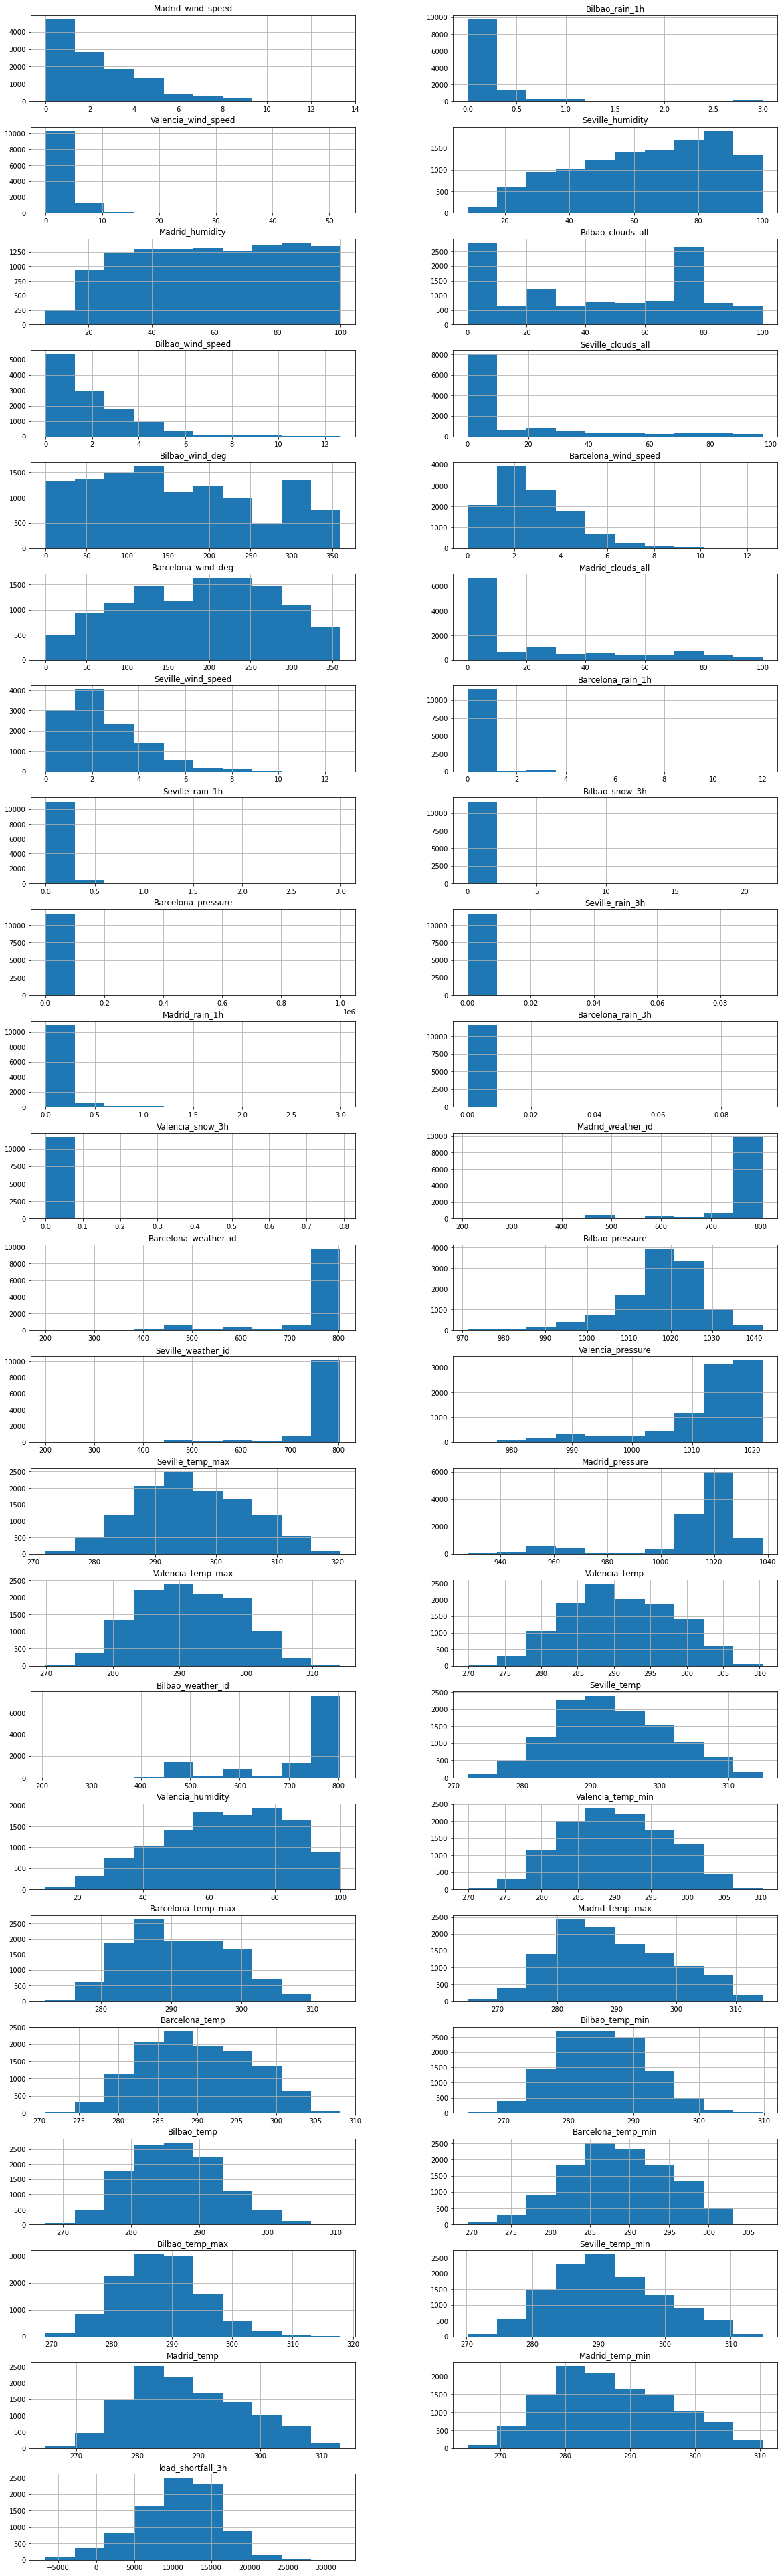

In [15]:
features = ['Madrid_wind_speed', 'Bilbao_rain_1h', 'Valencia_wind_speed', 
            'Seville_humidity', 'Madrid_humidity', 'Bilbao_clouds_all', 
            'Bilbao_wind_speed', 'Seville_clouds_all', 'Bilbao_wind_deg', 
            'Barcelona_wind_speed', 'Barcelona_wind_deg', 'Madrid_clouds_all', 
            'Seville_wind_speed', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Bilbao_snow_3h', 
            'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h', 'Barcelona_rain_3h', 
            'Valencia_snow_3h', 'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure', 
            'Seville_weather_id','Valencia_pressure','Seville_temp_max','Madrid_pressure', 
            'Valencia_temp_max','Valencia_temp', 'Bilbao_weather_id', 'Seville_temp', 
            'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max', 
            'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min', 'Bilbao_temp_max', 
            'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min', 'load_shortfall_3h']

final_data[features].hist(layout=(23, 2), figsize=(20,70));

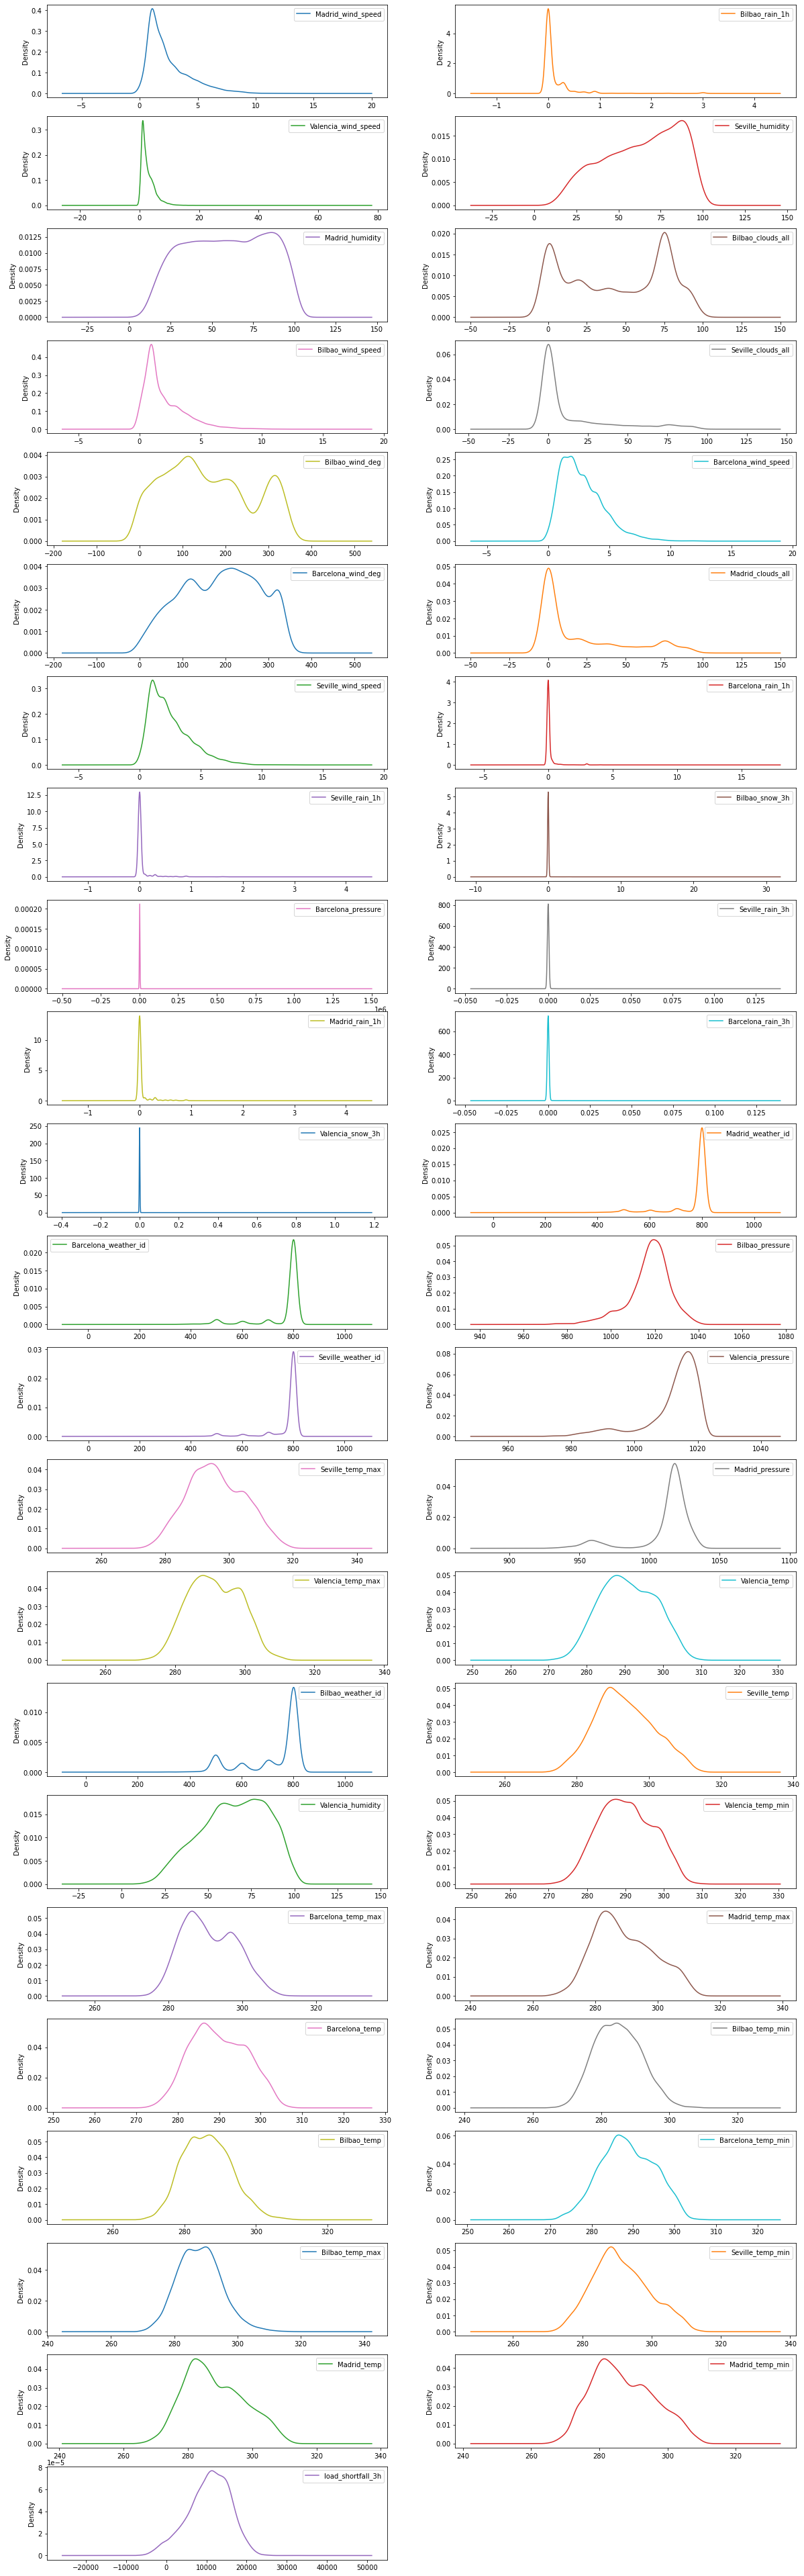

In [18]:
final_data[features].plot(kind='density', subplots=True, layout=(23, 2), sharex=False, figsize=(20,70));

### b. Box Plot and Violin Plot
For the Box Plot and Violin Plot, we will use the seaborn library and only select three random features instead of all the numerical features. We can visualise all numerical features simultaneously, 
but as the range of values for each feature is different, it will not create a useful visualisation.

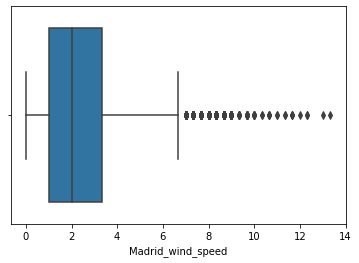

In [19]:
sns.boxplot(x='Madrid_wind_speed', data=final_data);

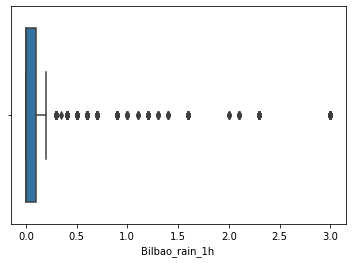

In [20]:
sns.boxplot(x='Bilbao_rain_1h', data=final_data);

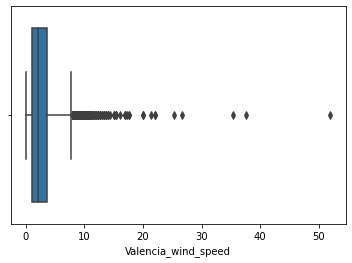

In [21]:
sns.boxplot(x='Valencia_wind_speed', data=final_data);

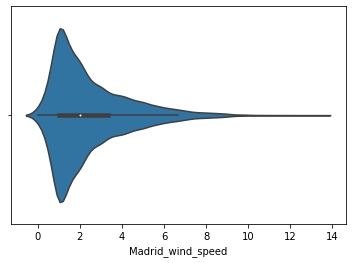

In [22]:
sns.violinplot(x='Madrid_wind_speed', data=final_data);

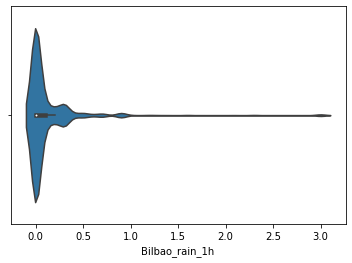

In [23]:
sns.violinplot(x='Bilbao_rain_1h', data=final_data);

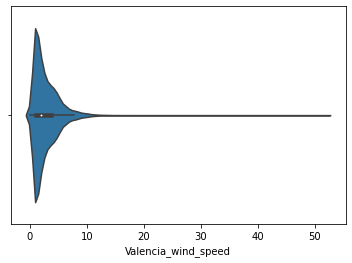

In [24]:
sns.violinplot(x='Valencia_wind_speed', data=final_data);

### c. BarPlot

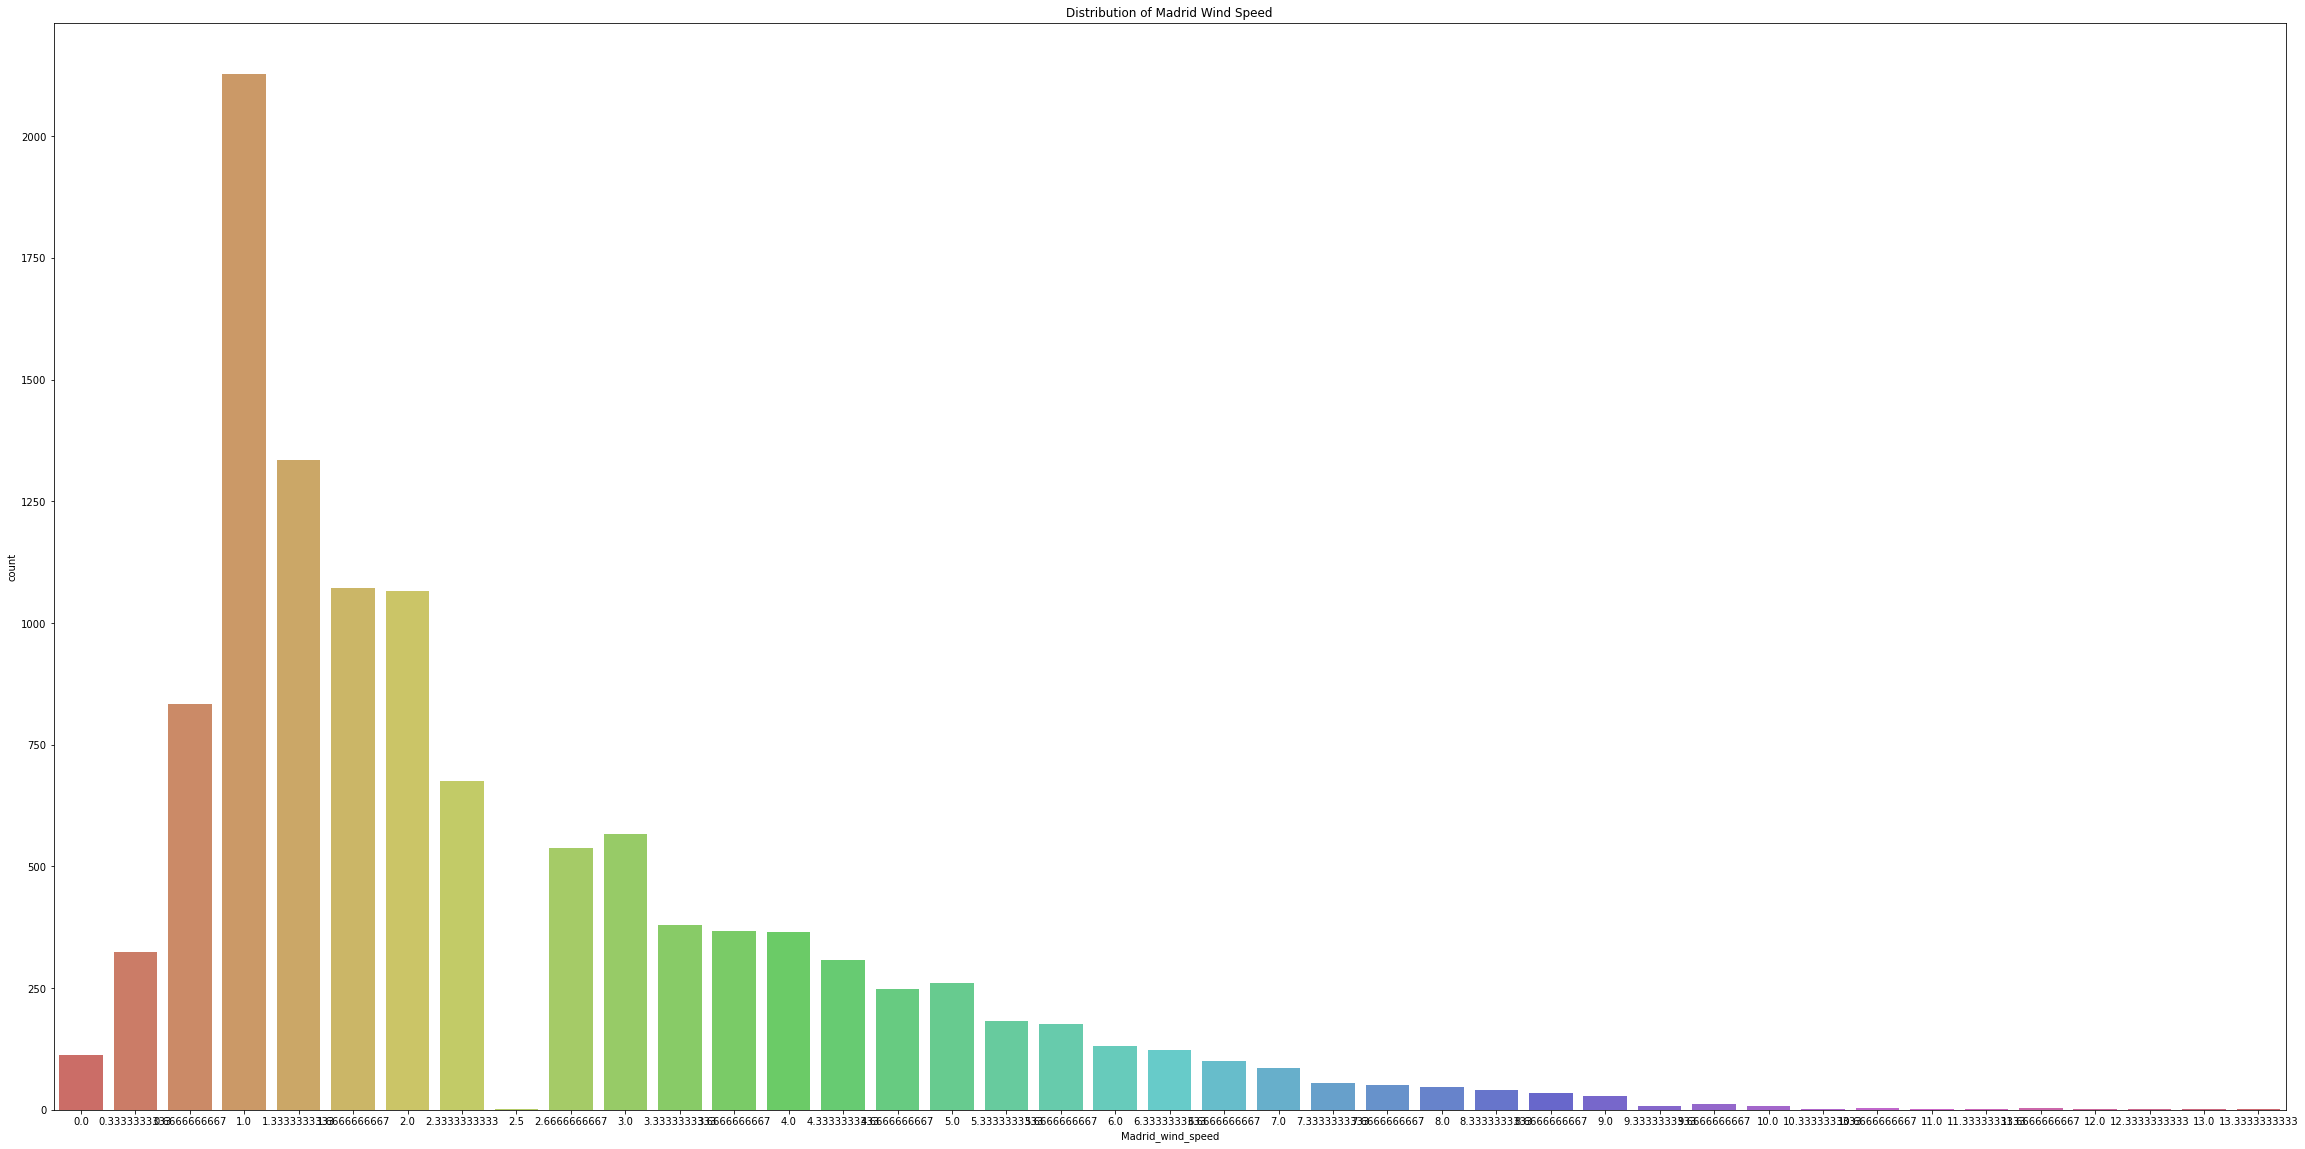

In [25]:
plt.figure(figsize=(40,20))
sns.countplot(x ='Madrid_wind_speed' , data = final_data, palette="hls")
plt.title("Distribution of Madrid Wind Speed");

 # III.  Multivariate Analysis: Non-Graphical 

In [26]:
final_data.corr()

Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
Madrid_wind_speed              1.000000        0.247761             0.524549   
Bilbao_rain_1h                 0.247761        1.000000             0.240118   
Valencia_wind_speed            0.524549        0.240118             1.000000   
Seville_humidity              -0.114347        0.063048            -0.095533   
Madrid_humidity               -0.116172        0.098192            -0.029066   
Bilbao_clouds_all              0.225566        0.361385             0.192272   
Bilbao_wind_speed              0.382617        0.075120             0.398683   
Seville_clouds_all             0.185177        0.074137             0.146475   
Bilbao_wind_deg                0.272466        0.255858             0.255511   
Barcelona_wind_speed           0.272295        0.070787             0.350592   
Barcelona_wind_deg            -0.083599       -0.020902            -0.057883   
Madrid_clouds_all              0.245055        0.127963             0.229440   
Seville_wind_speed             0.429858        0.118810             0.309374   
Barcelona_rain_1h              0.062114        0.060390             0.027630   
Seville_rain_1h                0.112461        0.083222             0.048719   
Bilbao_snow_3h                 0.062032        0.096260             0.101233   
Barcelona_pressure             0.009569        0.051968             0.044150   
Seville_rain_3h                0.004014        0.018764             0.022129   
Madrid_rain_1h                 0.170672        0.157344             0.100311   
Barcelona_rain_3h             -0.013045        0.003576            -0.038103   
Valencia_snow_3h               0.018883        0.008780             0.052041   
Madrid_weather_id             -0.178500       -0.126045            -0.103358   
Barcelona_weather_id          -0.094986       -0.110104            -0.041051   
Bilbao_pressure               -0.278214       -0.064473            -0.128770   
Seville_weather_id            -0.119056       -0.088641            -0.065004   
Valencia_pressure             -0.203967       -0.214059            -0.074355   
Seville_temp_max               0.027694       -0.173351            -0.037404   
Madrid_pressure               -0.153231       -0.302455            -0.143971   
Valencia_temp_max              0.109921       -0.137050             0.067461   
Valencia_temp                  0.106533       -0.133444             0.076280   
Bilbao_weather_id             -0.228350       -0.603190            -0.177013   
Seville_temp                   0.059882       -0.152139            -0.014881   
Valencia_humidity             -0.293759       -0.090703            -0.429268   
Valencia_temp_min              0.100117       -0.126690             0.082254   
Barcelona_temp_max             0.038752       -0.153656            -0.035119   
Madrid_temp_max                0.064625       -0.148284            -0.020645   
Barcelona_temp                 0.051990       -0.138938            -0.016290   
Bilbao_temp_min                0.051152       -0.143191            -0.002094   
Bilbao_temp                    0.036799       -0.182022            -0.014087   
Barcelona_temp_min             0.059285       -0.114654             0.005129   
Bilbao_temp_max                0.020677       -0.219710            -0.024867   
Seville_temp_min               0.077828       -0.120818             0.002894   
Madrid_temp                    0.078077       -0.137182            -0.012830   
Madrid_temp_min                0.064200       -0.120395            -0.024767   
load_shortfall_3h             -0.150981       -0.152510            -0.142791   

                      Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
Madrid_wind_speed            -0.114347        -0.116172           0.225566   
Bilbao_rain_1h                0.063048         0.098192           0.361385   
Valencia_wind_speed          -0.095533        -0.029066           0.192272   
Seville_humidity             

# IV.  Multivariate Analysis: Graphical

# evaluate correlation

### a. Correlation Heatmap

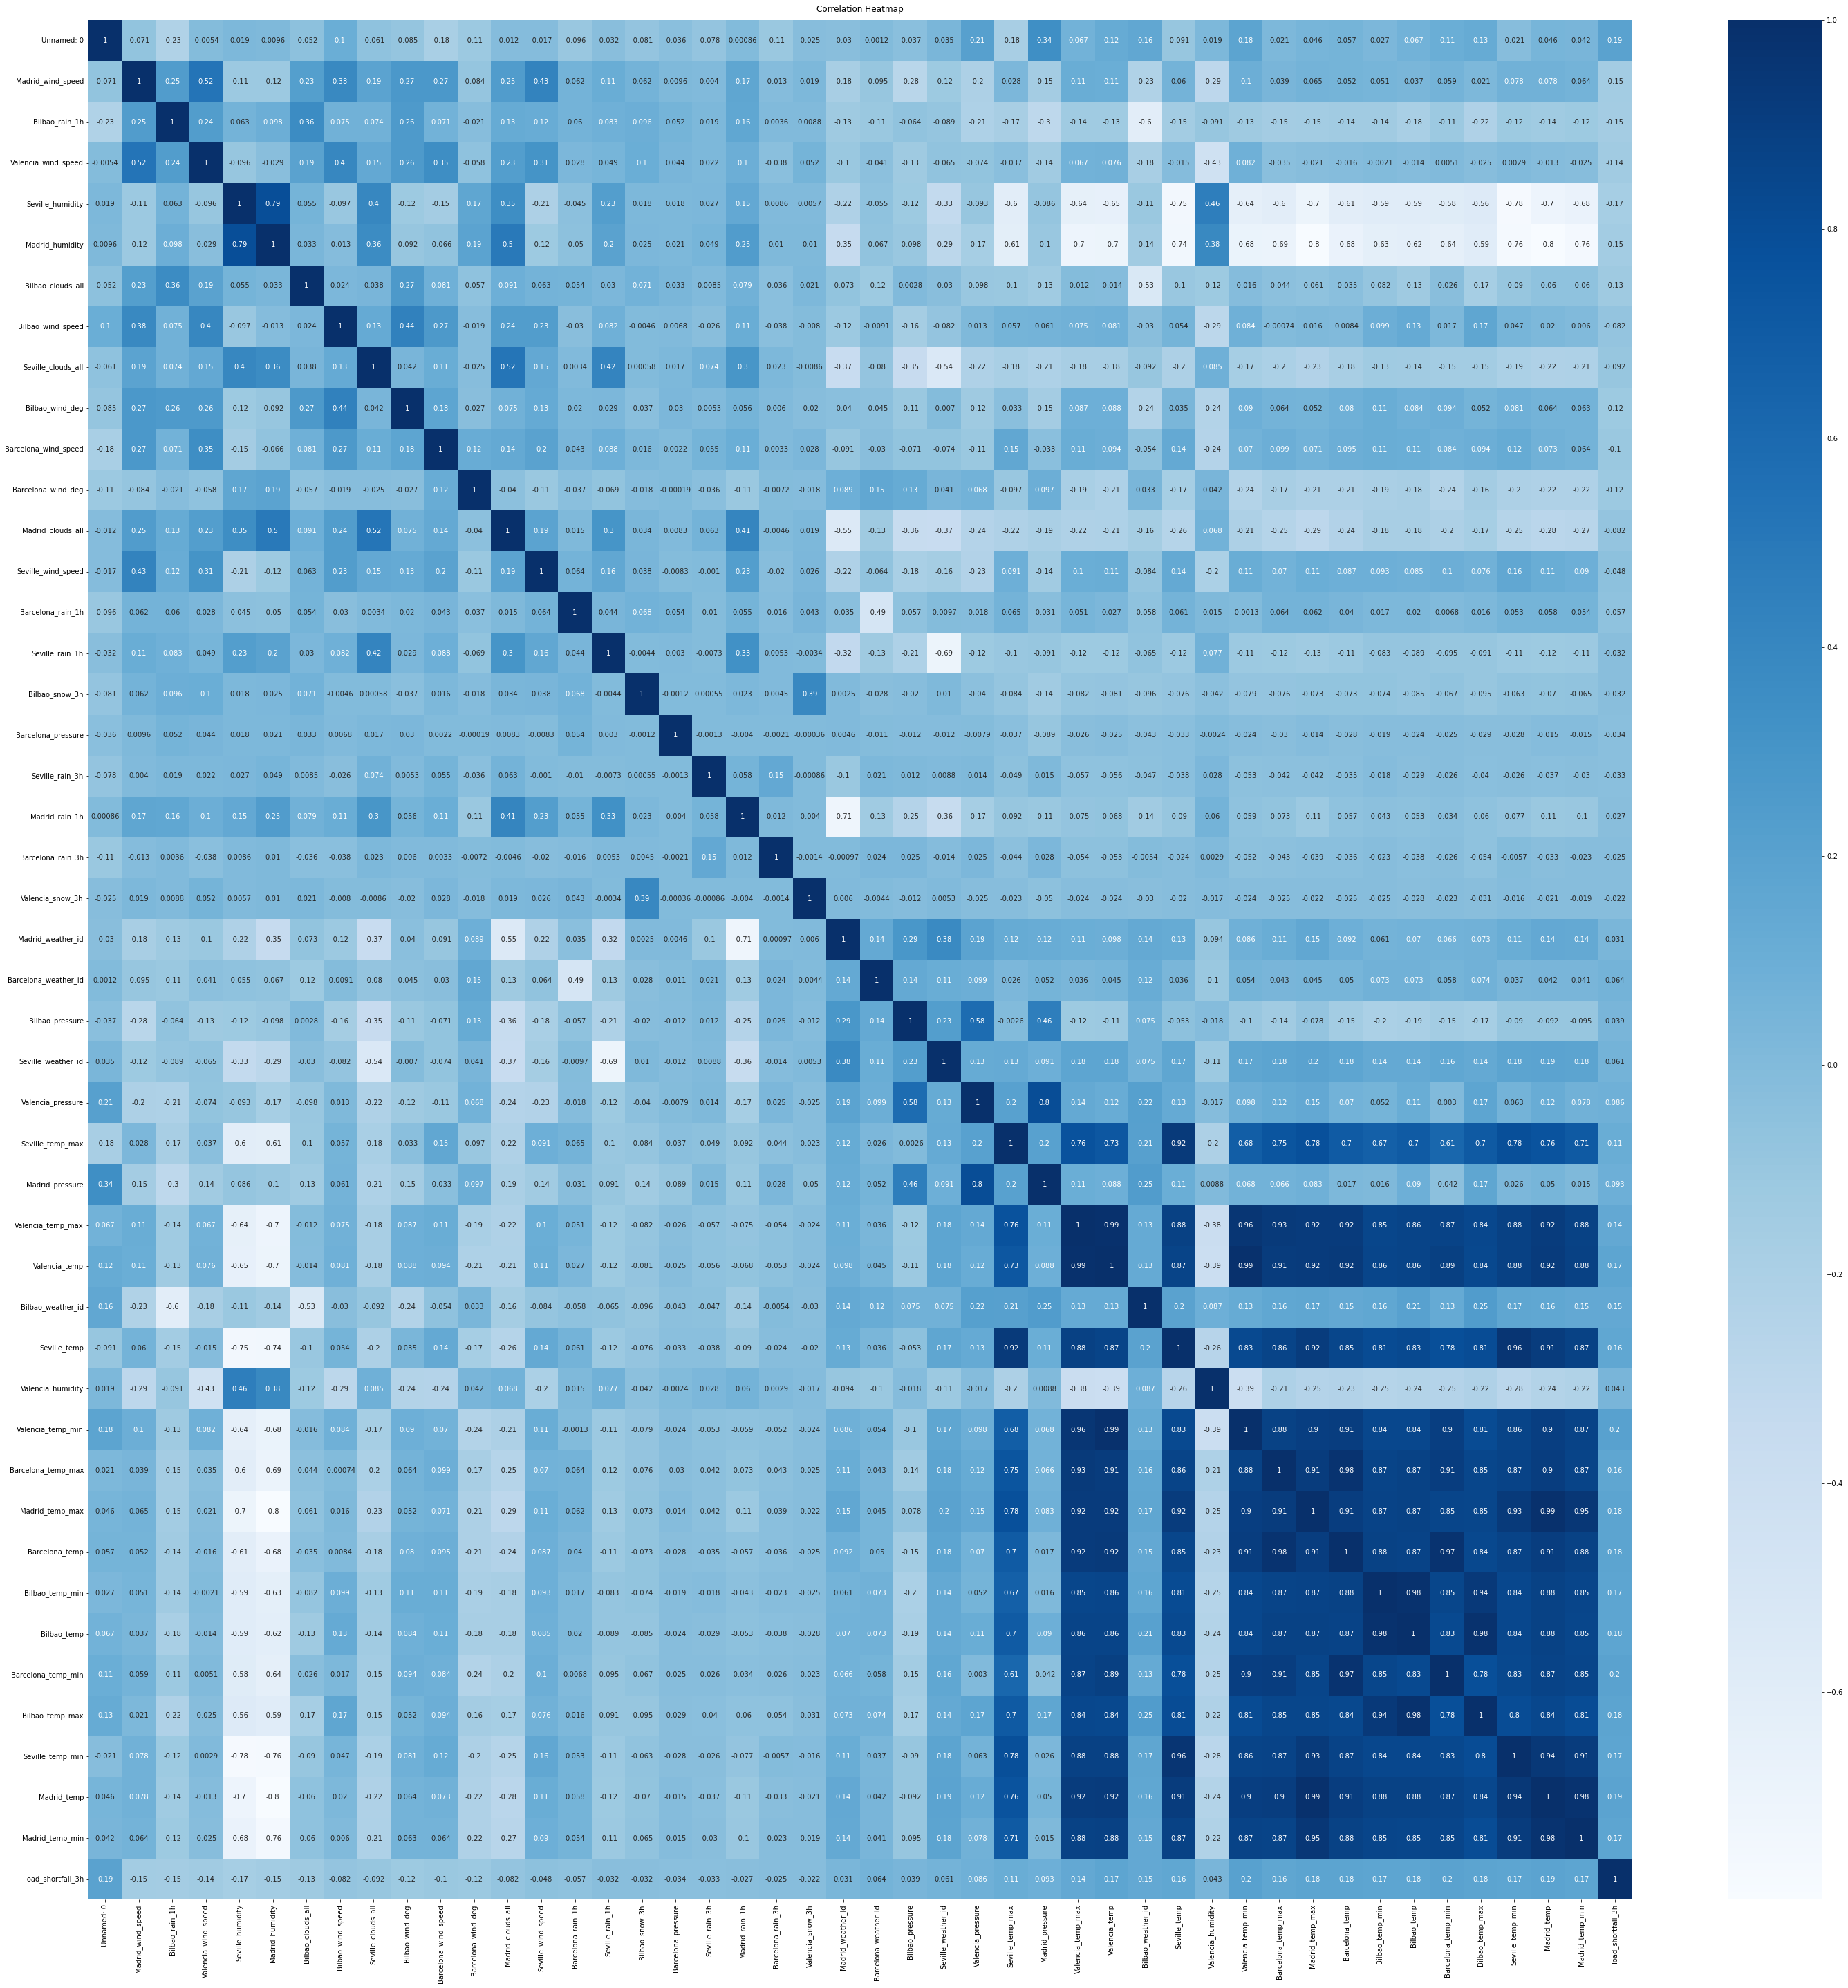

In [28]:
plt.figure(figsize=(50,50))
heatmap = sns.heatmap(merged_data.corr(),cbar=True,annot=True,cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### b. Scatter Plot

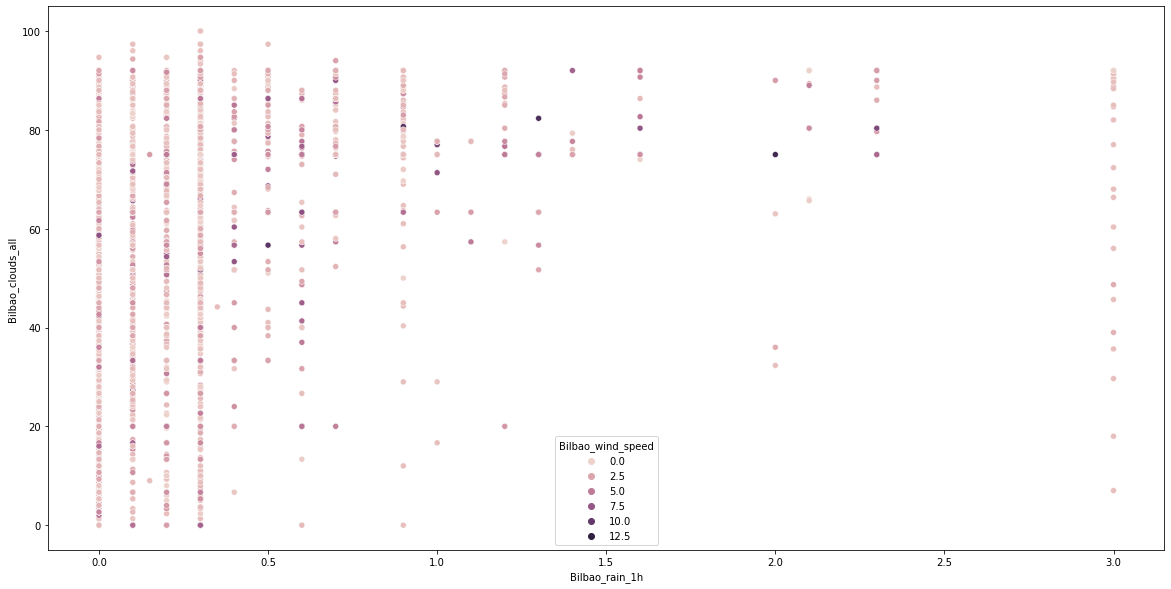

In [29]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Bilbao_rain_1h',y='Bilbao_clouds_all',hue='Bilbao_wind_speed',data=final_data);

In [ ]:
# plot relevant feature interactions

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
# remove missing values/ features

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.linear_model import *

from tqdm import tqdm
import math
import random

from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns

In [40]:
#Now lets tackle nulls in the dataset
final_data['Valencia_pressure']=final_data['Valencia_pressure'].fillna(final_data['Valencia_pressure'].mode()[0])


In [41]:
final_data['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [42]:
# We wish to extract numbers from object columns i.e Valencia_wind_deg and Seville_pressure
#for Valencia_wind_deg
final_data['Valencia_wind_deg'] = final_data['Valencia_wind_deg'].str.extract('(\d+)')
final_data['Valencia_wind_deg'] = pd.to_numeric(final_data['Valencia_wind_deg'])

#Seville_pressure
final_data['Seville_pressure']=final_data['Seville_pressure'].str.extract('(\d+)')
final_data['Seville_pressure']=pd.to_numeric(final_data['Seville_pressure'])

AttributeError: Can only use .str accessor with string values!

In [43]:
y = final_data[:len(train)][['load_shortfall_3h']]
x = final_data[:len(train)].drop('load_shortfall_3h', axis = 1)

x_train = final_data[:len(final_data)].drop('load_shortfall_3h', axis = 1)
x_test = final_data[len(final_data):].drop('load_shortfall_3h', axis = 1)


In [44]:
x.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   
2           1.000000                  9             0.0             1.000000   
3           1.000000                  8             0.0             1.000000   
4           1.000000                  7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Barcelona_temp_max  \
0                 0.0       223.333333  ...          281.013000   
1                 0.0       221.000000  ...          280.561667   
2                 0.0       214.333333  ...          281.583667   
3                 0.0       199.666667  ...          283.434104   
4                 0.0       185.000000  ...          284.213167   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       265.938000      281.013000       269.338615   269.338615   
1       266.386667      280.561667       270.376000   270.376000   
2       272.708667      281.583667       275.027229   275.027229   
3       281.895219      283.434104       281.135063   281.135063   
4       280.678437      284.213167       282.252063   282.252063   

   Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
0          281.013000       269.338615        274.254667   265.938000   
1          280.561667       270.376000        274.945000   266.386667   
2          281.583667       275.027229        278.792000   272.708667   
3          283.434104       281.135063        285.394000   281.895219   
4          284.213167       282.252063        285.513719   280.678437   

   Madrid_temp_min  
0       265.938000  
1       266.386667  
2       272.708667  
3       281.895219  
4       280.678437  

[5 rows x 46 columns]

In [45]:
y.head()

load_shortfall_3h
0        6715.666667
1        4171.666667
2        4274.666667
3        5075.666667
4        6620.666667

In [46]:
#Select model
lr = LinearRegression()

# split data

In [47]:
#Split dataset into train and test
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2)

In [48]:

y_train.isnull().sum()

load_shortfall_3h    0
dtype: int64

# create one or more ML models

### Fit lr model to x_train and y_train...Then predict

In [49]:
lr.fit(x_train, y_train)

prediction = lr.predict(x_test)

# evaluate one or more ML models

### Evaluate Model (RMSE)

In [50]:
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [51]:
rmse(y_test, prediction)

4770.083396168792

## Calculate r_score

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.14794797406074423

In [53]:
x_train

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
5945           2.333333                 10             0.2   
3271           8.000000                  8             0.3   
7968           0.666667                  5             0.0   
1633           3.000000                  3             0.0   
7344           4.666667                  2             0.0   
...                 ...                ...             ...   
7753           5.666667                  3             0.0   
5726           5.333333                  3             0.0   
3827           0.666667                  6             0.3   
1426           3.000000                  3             0.0   
8222           0.333333                  4             0.0   

      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
5945             6.666667         50.666667        47.666667   
3271             8.666667         56.000000        77.333333   
7968             3.000000         31.333333        31.333333   
1633             4.000000         24.000000        21.000000   
7344             3.000000         31.333333        73.333333   
...                   ...               ...              ...   
7753             1.666667         51.666667        41.666667   
5726             7.333333         85.333333        72.666667   
3827             1.666667         86.333333        83.000000   
1426             2.666667         25.000000        13.333333   
8222             0.666667         79.000000        58.333333   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
5945          75.000000           3.666667                20.0   
3271          75.000000           6.000000                45.0   
7968           6.666667           1.000000                 0.0   
1633          85.000000           7.333333                 0.0   
7344          43.333333           1.000000                 0.0   
...                 ...                ...                 ...   
7753          13.333333           4.666667                20.0   
5726          75.000000           0.000000                 0.0   
3827          75.000000           0.666667                 0.0   
1426          75.000000           0.666667                 0.0   
8222           0.000000           0.333333                 0.0   

      Bilbao_wind_deg  ...  Barcelona_temp_max  Madrid_temp_max  \
5945       333.333333  ...          284.483333       282.150000   
3271       296.666667  ...          290.483333       282.216667   
7968        83.333333  ...          297.816667       301.483333   
1633       323.333333  ...          305.556667       307.150000   
7344       100.000000  ...          303.816667       295.483333   
...               ...  ...                 ...              ...   
7753       110.000000  ...          301.150000       300.816667   
5726         0.000000  ...          286.150000       283.150000   
3827       160.000000  ...          285.380000       282.495000   
1426        20.000000  ...          300.930000       309.483333   
8222        58.666667  ...          288.483333       288.483333   

      Barcelona_temp  Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  \
5945      283.816667       275.816667   278.360000          283.150000   
3271      290.483333       278.483333   279.666667          290.483333   
7968      297.316667       297.816667   299.690000          296.816667   
1633      301.283333       293.710000   295.586667          296.300000   
7344      302.230000       297.483333   300.050000          300.483333   
...              ...              ...          ...                 ...   
7753      300.650000       293.150000   294.340000          300.150000   
5726      285.816667       278.483333   280.916667          285.483333   
3827      283.996667       281.865000   283.508333          280.753333   
1426      297.856667       291.816667   293.293333          294.446667   
8222      287.816667       278.816667   281.200000          287.150000   

     

In [54]:
# create targets and features dataset

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

## This is for the submission process

In [55]:
x_train = final_data[:len(train)].drop('load_shortfall_3h', axis = 1)
x_test = final_data[len(train):].drop('load_shortfall_3h', axis = 1)

In [56]:
lr.fit(x_train, y)
prediction = lr.predict(x_test)

In [57]:
daf = pd.DataFrame(prediction, columns = ['load_shortfall_3h'])
daf.head()

load_shortfall_3h
0        9722.354933
1        8795.992820
2        9902.349678
3        9773.179514
4        9509.260584

In [58]:
output = pd.DataFrame({'time':test['time']})
submission = output.join(daf)
submission.to_csv('submission.csv', index = False)